# Arsy Bilahil tama

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/M2/

/content/gdrive/MyDrive/M2


In [3]:
!pwd

/content/gdrive/MyDrive/M2


In [ ]:
#!pip install kaggle

In [ ]:
#!mkdir kaggle

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

In [ ]:
#!unzip ./indonesian-abusive-and-hate-speech-twitter-text.zip

In [ ]:
#! wget https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2

--2022-02-27 17:10:04--  https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 751724474 (717M) [application/octet-stream]
Saving to: ‘idwiki-latest-pages-articles.xml.bz2.1’

idwiki-latest-pages 100%[===================>] 716.90M  4.52MB/s    in 2m 39s  

2022-02-27 17:12:43 (4.52 MB/s) - ‘idwiki-latest-pages-articles.xml.bz2.1’ saved [751724474/751724474]



In [ ]:
#! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz

--2022-02-27 19:13:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4507049071 (4.2G) [application/octet-stream]
Saving to: ‘cc.id.300.bin.gz’

cc.id.300.bin.gz    100%[===================>]   4.20G  45.2MB/s    in 1m 41s  

2022-02-27 19:14:58 (42.6 MB/s) - ‘cc.id.300.bin.gz’ saved [4507049071/4507049071]



link : https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text
### deskripsi data : 
dari dataset ini merupakan dataset tentang hate speech dari media sosial Twitter yang dimana terdapat jenis-jenis hate speech:

### problem
1. tujuan dari model yang akan dibuat dapat mengklasifikasi sebuat tweet merupakan sebuah kalimat hate speech atau tidak, dan jika tweet tersebut merupakan hate speech, maka jenis hate speech seperti apa.
2. tujuan utuk pemodelan pertama, ingin meminimalisir FN, sehingga menggunakan recall




In [4]:
pip install symspellpy

In [5]:
pip install Sastrawi

In [6]:
pip install WordCloud

In [7]:
pip install tensorflow_hub

In [8]:
! pip install fasttext

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import re 
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # lemmatization
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory 

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize #tokenization word
from nltk.probability import FreqDist # requesncy word
from nltk.corpus import stopwords # filtering
from symspellpy import SymSpell

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter
import gzip
from urllib.request import urlopen

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential




import tensorflow_hub as hub

pd.get_option("display.max_columns")

0

In [10]:
#pip install nltk
#!pip install Sastrawi
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df_alay = pd.read_csv('new_kamusalay.csv', encoding="latin-1")

df = pd.read_csv("data.csv", encoding='latin-1')
df.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['HS'], test_size=0.1)

In [ ]:
print(f'train : {X_train.shape}')
print(f'test : {X_test.shape}')

train : (11852,)
test : (1317,)


In [14]:
#train
X_train = pd.DataFrame(X_train).reset_index()
y_train = pd.DataFrame(y_train).reset_index()

In [15]:
#test
X_test = pd.DataFrame(X_test).reset_index()
y_test = pd.DataFrame(y_test).reset_index()

In [16]:
# menyatukan train
df_train = pd.merge(X_train, y_train, on='index', how='right')

In [17]:
# menyatukan test
df_test = pd.merge(X_test, y_test, on='index', how='right')

In [ ]:
df_test

,index,Tweet,HS
0,11613,USER USER Dulu zaman sby gampang korupsi bisa ...,1
1,8367,USER USER Mulut berbusa lalu muncrat kemana ma...,1
2,379,Sudah jangan terlalu banyak membingkai bangkai...,0
3,11365,USER Setahu Saya sejak zaman Soegija sudah ada...,0
4,1578,"jadi, di #fwg2018 akan ada banyak sekali pertu...",0
...,...,...,...
1312,1260,Budaya demokrasi Amerika Serikat itu jauh lebi...,0
1313,4471,USER USER USER Cebong baru netas. Disuruh nyer...,1
1314,2419,"Berita ini sudah Anda twitt tgl 18 Pak Lukman,...",1
1315,7729,Tolong analisa sejarah kejatuhan krjaan Uthman...,0


In [ ]:
df_train.head()

,index,Tweet,HS
0,3853,USER Banyakin bersyukur aja. Syukuran ga dikas...,0
1,2375,Warga Pemuteran tolak Berita hoax dan dukung p...,0
2,2404,"Atas dasar itulah, DPR diminta segera rampungk...",0
3,10725,Masuk kelab malam pun ada â??etika pemakaianâ?...,0
4,4074,Temukan pesona keindahan tentang Cirebon mulai...,0


In [ ]:
%matplotlib inline
fig = px.pie(names = ['HS', 'no_HS'],
             values = [df['HS'].value_counts()[1], df['HS'].value_counts()[0]],
             title = 'persentase label',
             color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
%matplotlib inline
# jumlah stiap jenis hate speech
Abusife = len(df[df['Abusive']==1])
HS_Ind = len(df[df['HS_Individual']==1])
HS_Group = len(df[df['HS_Group']==1])
HS_Religion = len(df[df['HS_Religion']==1])
HS_Race = len(df[df['HS_Race']==1])
HS_physical = len(df[df['HS_Physical']==1])
HS_Gender = len(df[df['HS_Gender']==1])
HS_Other = len(df[df['HS_Other']==1])
HS_Weak = len(df[df['HS_Weak']==1])
HS_Moderate = len(df[df['HS_Moderate']==1])
HS_Strong = len(df[df['HS_Strong']==1])

jenis = ['Abusive', 'HS_Ind', 'HS_Religion', 'HS_Race', 'HS_physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
count = [Abusife, HS_Group, HS_Religion, HS_Race, HS_physical, HS_Gender, HS_Other, HS_Weak, HS_Moderate, HS_Strong]

fig = px.pie(names = jenis,
             values = count, 
             title = 'jumlah seluruh jenis hate speech',
             color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textinfo='percent+label')
fig.show()

In [18]:
df_alay.rename(columns={'anakjakartaasikasik':'original', 'anak jakarta asyik asyik' : 'replace'}, inplace=True)
df_alay.head()

,original,replace
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [19]:

def lower(text):
  return text.lower()


def case_folding(text):
  #text  = re.sub('[^\x00-\x7f]','',text)
  text = re.sub(r"http\S+",' ',text)
  text  = re.sub(r"\\n",' ', text.strip())
  text = (re.sub(r"\\x[A-Za-z0-9./]+", r' ', text))
  text = re.sub(r'rt', ' ', text)
  text = re.sub(r'user', ' ', text)
  text = re.sub("#.+\S",' ',text)
  text = re.sub(r"\b(?=[wk]*w)w*k[wk]*\b | wkwk", ' ', text)
  text = re.sub(r"wkwk", '', text)
  text = re.sub(r"\b(?=[ha]*h)h*a[ha]*\b | haha", ' ', text)
  text = re.sub(r'\d', ' ',text)
  return text


def punctuation(text):
  text = text.translate(str.maketrans(" "," ", string.punctuation))
  return text


alay_dict = dict(zip(df_alay['original'], df_alay['replace']))
def replace(text):
  return ' '.join(alay_dict[word] if word in alay_dict else word for word in text.split(' '))


def strip(text):
  text = text.strip()
  return text


def preprocess_filter(text):
  text = lower(text)
  text = case_folding(text)
  text = punctuation(text)
  text = replace(text)
  text = strip(text)
  #text = emoticon(text)
  return text


In [21]:
df_train['text'] = df_train['Tweet'].apply(preprocess_filter)
df_train[['text']].head(10)

,text
0,insya allah
1,ayo umat islam yang pintar jangan percaya kala...
2,utang triliun tapi para kampret yang hidu...
3,bukanya yang selalu gagal paham sih kecebong d...
4,beliau warga katolik di sana mas kirim nomorny...
5,kalau kak rosanita ayamor dia tegur macam nih ...
6,jangan kayak banci kaleng kamu gatot sering bu...
7,fakta veve dulu punya anjing namanya juno dan ...
8,gue merasa bego kamu jawab begitu mulu
9,awas ini proyek partai komunis indonesia cina ...


In [ ]:
df_train.isnull().sum()

index    0
Tweet    0
HS       0
text     0
dtype: int64

In [22]:
# tokenizer word
def tokenize_word(text):
  text = word_tokenize(text)
  return text

df_train['token_word'] = df_train['text'].apply(tokenize_word)

In [23]:
# jumlah kata dalam kalimat kalimat
list_count = []
for i in df_train['token_word']:
    list_count.append(len(i))

In [26]:
df_count = pd.DataFrame(list_count, columns=['count_word']).reset_index()
df_count.head()

,index,count_word
0,0,2
1,1,27
2,2,20
3,3,8
4,4,9


In [27]:
df_train.columns

Index(['index', 'Tweet', 'HS', 'text', 'token_word'], dtype='object')

In [28]:
df_train = df_train.reset_index()
df_train.drop(columns=['index'], axis=1,inplace=True)
df_train.rename(columns={'level_0' : 'index'}, inplace=True)

In [29]:
df_train = pd.merge(df_train, df_count, on='index', how='right')

In [30]:
df_hs = df_train[['text', 'token_word', 'count_word','HS']].copy()

df_hs.head()

,text,token_word,count_word,HS
0,insya allah,"[insya, allah]",2,1
1,ayo umat islam yang pintar jangan percaya kala...,"[ayo, umat, islam, yang, pintar, jangan, perca...",27,1
2,utang triliun tapi para kampret yang hidu...,"[utang, triliun, tapi, para, kampret, yang, hi...",20,1
3,bukanya yang selalu gagal paham sih kecebong d...,"[bukanya, yang, selalu, gagal, paham, sih, kec...",8,1
4,beliau warga katolik di sana mas kirim nomorny...,"[beliau, warga, katolik, di, sana, mas, kirim,...",9,0


In [31]:
count_perword = pd.DataFrame(df_hs['count_word'].value_counts()).reset_index()
count_perword.rename(columns={'index':'jum_kata', 'count_word':'quantity'}, inplace=True)
count_perword.head()

,jum_kata,quantity
0,9,522
1,10,521
2,6,518
3,8,511
4,7,506


In [ ]:
%matplotlib inline
fig = px.bar(count_perword.head(),
             x='jum_kata',
             y='quantity',
             color='quantity',
             title='quantity jumlah perkata dalam kalimat')

fig.show()

jumlah kata paling banyak yaitu dengan jumlah 9 dengan quantity 585

In [32]:
df_hs

,text,token_word,count_word,HS
0,insya allah,"[insya, allah]",2,1
1,ayo umat islam yang pintar jangan percaya kala...,"[ayo, umat, islam, yang, pintar, jangan, perca...",27,1
2,utang triliun tapi para kampret yang hidu...,"[utang, triliun, tapi, para, kampret, yang, hi...",20,1
3,bukanya yang selalu gagal paham sih kecebong d...,"[bukanya, yang, selalu, gagal, paham, sih, kec...",8,1
4,beliau warga katolik di sana mas kirim nomorny...,"[beliau, warga, katolik, di, sana, mas, kirim,...",9,0
...,...,...,...,...
11847,boleh tanya deny ini muslim atau kristen ya,"[boleh, tanya, deny, ini, muslim, atau, kriste...",8,0
11848,yang ada di otaknya tentang kesetaraan gender ...,"[yang, ada, di, otaknya, tentang, kesetaraan, ...",12,1
11849,makanya paling aman sekolahkan katolikkristen ...,"[makanya, paling, aman, sekolahkan, katolikkri...",17,0
11850,ayo mas goen serukan kepada semua muslim berhe...,"[ayo, mas, goen, serukan, kepada, semua, musli...",20,1


In [33]:
list_word=[]
for i in df_hs['token_word']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
fdict.most_common(10)

[('yang', 4403),
 ('tidak', 2814),
 ('di', 2757),
 ('dan', 2715),
 ('itu', 1897),
 ('kamu', 1624),
 ('ini', 1409),
 ('indonesia', 1310),
 ('ada', 1290),
 ('sudah', 1186)]

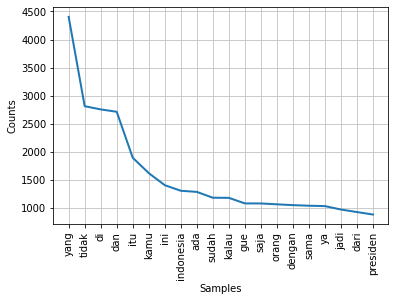

In [34]:
fdict.plot(20)
plt.show()

In [35]:
# lemmatization
fectory_stemmer = StemmerFactory()
stemmer_fec = fectory_stemmer.create_stemmer()

def lemma(text):
  text = stemmer_fec.stem(text)
  return text

df_hs['text_lemma'] = df_hs['text'].apply(lemma)

In [36]:
df_hs.head()

,text,token_word,count_word,HS,text_lemma
0,insya allah,"[insya, allah]",2,1,insya allah
1,ayo umat islam yang pintar jangan percaya kala...,"[ayo, umat, islam, yang, pintar, jangan, perca...",27,1,ayo umat islam yang pintar jangan percaya kala...
2,utang triliun tapi para kampret yang hidu...,"[utang, triliun, tapi, para, kampret, yang, hi...",20,1,utang triliun tapi para kampret yang hidup mel...
3,bukanya yang selalu gagal paham sih kecebong d...,"[bukanya, yang, selalu, gagal, paham, sih, kec...",8,1,buka yang selalu gagal paham sih kecebong dongok
4,beliau warga katolik di sana mas kirim nomorny...,"[beliau, warga, katolik, di, sana, mas, kirim,...",9,0,beliau warga katolik di sana mas kirim nomor ya


In [ ]:
#list all word
list_word=[]
for i in df_hs['token_word']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
fdict.keys()

dict_keys(['perbanyak', 'bersyukur', 'saja', 'syukuran', 'tidak', 'dikasih', 'cacat', 'yang', 'terlalu', 'aku', 'insecure', 'tapi', 'hasilnya', 'minder', 'malah', 'lihat', 'lebih', 'cantik', 'kok', 'kamu', 'kesal', 'warga', 'pemutaran', 'tolak', 'berita', 'hoaks', 'dan', 'dukung', 'pilihan', 'kepala', 'daerah', 'damai', 'atas', 'dasar', 'itulah', 'dewan', 'perwakilan', 'rakyat', 'diminta', 'segera', 'rampungkan', 'revisi', 'undang', 'terorisme', 'untuk', 'melindungi', 'segenap', 'bangsa', 'indonesia', 'dari', 'serangan', 'keji', 'teroris', 'masuk', 'kelab', 'malam', 'pun', 'ada', 'âetika', 'pemakaiannya', 'masjid', 'terang', 'paparkan', 'etika', 'pemakaian', 'langgar', 'pergi', 'iran', 'boleh', 'pula', 'kelambu', 'diri', 'memahami', 'adab', 'amp', 'budaya', 'di', 'sana', 'apa', 'beda', 'beradab', 'sini', 'dengan', 'menampak', 'sangat', 'sakit', 'k', 'temukan', 'pesona', 'keindahan', 'tentang', 'cirebon', 'mulai', 'kuliner', 'bahasa', 'sejarah', 'kesenian', 'eksotisme', 'dunia', 'malamn

In [ ]:
df_hs.head()

,text,token_word,count_word,HS,text_lemma
0,perbanyak bersyukur saja syukuran tidak dikasi...,"[perbanyak, bersyukur, saja, syukuran, tidak, ...",23,0,banyak syukur saja syukur tidak kasih cacat ya...
1,warga pemutaran tolak berita hoaks dan dukung ...,"[warga, pemutaran, tolak, berita, hoaks, dan, ...",11,0,warga putar tolak berita hoaks dan dukung pili...
2,atas dasar itulah dewan perwakilan rakyat dimi...,"[atas, dasar, itulah, dewan, perwakilan, rakya...",22,0,atas dasar itu dewan wakil rakyat minta segera...
3,masuk kelab malam pun ada âetika pemakaiannya ...,"[masuk, kelab, malam, pun, ada, âetika, pemaka...",43,0,masuk kelab malam pun ada etika pakai masuk ma...
4,temukan pesona keindahan tentang cirebon mulai...,"[temukan, pesona, keindahan, tentang, cirebon,...",17,0,temu pesona indah tentang cirebon mulai dari k...


In [37]:
wiki = WikiCorpus('idwiki-latest-pages-articles.xml.bz2.1', lemmatize=False, dictionary = {})

with open("wiki-id-formatted.txt", 'w', encoding="utf8") as output:
     counter = 0
     for text in wiki.get_texts():
         output.write(' '.join(text)+"\n")
         counter = counter + 1
         if counter > 200000: # Hanya mengambil 200,000 artikel pertama dari total artikel sekitar 300,000
             break

In [38]:
# create dictionary for symspell

sym_spell = SymSpell()
corpus_path = "wiki-id-formatted.txt"
sym_spell.create_dictionary(corpus_path)

True

In [39]:
spell_df = df_hs[['text_lemma', 'HS']].copy()

In [40]:
review = []
for index, row in spell_df.iterrows():
    suggestions = sym_spell.lookup_compound(row["text_lemma"], max_edit_distance=2)
    review.append(suggestions[0].term)
    
spell_df["text_lemma"] = review
spell_df.head()

,text_lemma,HS
0,insya allah,1
1,ayo umat islam yang pintar jangan percaya kala...,1
2,utang triliun tapi para kampret yang hidup mel...,1
3,buka yang selalu gagal paham sih kecebong pongok,1
4,beliau warga katolik di sana mas kirim nomor ya,0


In [41]:
# filtering word
list_stopwords_ind = stopwords.words('indonesian')
list_stopwords_eng = stopwords.words('english')

list_stopwords_ind.extend(['uniform','resource','locator','ya', 'be', 'emu','gue','si','nos','tal','gia','buk','t','rl','nya','ah', 
                       'inya','pe','ai','hem','d', 'i', ' ', 's', 'a', 't', 'e', 'm', 'u', 'c', 'o', 'w', 'k', 'h', 'l', 'p', 'r', 'g',
                       'n', 'y', 'b', 'f', 'j', 'z', 'q', 'v', 'x','sih','jil','bodohgk', 'apbnmakanya', 'analisissusah', 'bloonkw', 'recepanda', 
                       'pakkkkbukan','begou','ngeeooahahahaaaaaaa', 'cobalh','speleamp','suliddddd','abissss','permisif','hmmrasakeenn', 'udikkampungansampah',
                       'udeeeh', 'idjo', 'lagiiiiiiii','beresss','fh','nihpergi','zonknol','besarkakean', 'alaaaahkyak', 'berhasillain','cerdasberubah', 
                       'cebongxixixix', 'kapiryg','imporhduh', 'je', 'ikel','digorenggoreng', 'gosongsuara','pemerintahujungujungnya', 'kabehhhh', 'ajaibyg', 
                       'siapayg', 'wkwk','haha','bongwkkwwkwk',' ngahahahaha','sabaaaaaaaaaarrr','soekarnomenggelora','alhamdulillaahcengkudu',' goxxxd'
                       ,'difotofotonya','ð','½','â','¤','ï','ª','©','¨','¥','²','±','ù','ø','\xad','§','¹','¿','·','µ','ë','¯','º','¼',
                       '³','makcik'])



def nltk_stemmer_indo(text1):
  text = word_tokenize(text1)
  return [word for word in text if word not in list_stopwords_ind]

def nltk_stemmer_eng(text1):
  return [word for word in text1 if word not in list_stopwords_eng]


spell_df['text_filtering'] = spell_df['text_lemma'].apply(nltk_stemmer_indo)
spell_df['text_filtering'] = spell_df['text_filtering'].apply(nltk_stemmer_eng)

In [42]:
list_word=[]
for i in spell_df['text_filtering']:
  for u in i:
    list_word.append(u)

fdict = FreqDist(list_word)
fdict.most_common(10)

[('indonesia', 1320),
 ('orang', 1257),
 ('presiden', 936),
 ('jokowi', 869),
 ('islam', 736),
 ('agama', 725),
 ('komunis', 624),
 ('pilih', 617),
 ('asing', 612),
 ('rakyat', 576)]

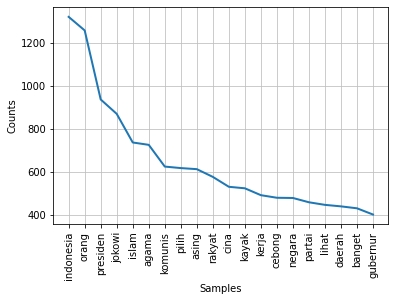

In [43]:
fdict.plot(20)
plt.show()

In [44]:
#change list to kalimat
def listToString(text): 
  return ' '.join(map(str, text))

spell_df['str_filtered'] = spell_df['text_filtering'].apply(listToString)

In [45]:
df_hs_1 = spell_df[spell_df['HS']==1].copy()
df_hs_0 = spell_df[spell_df['HS']==0].copy()

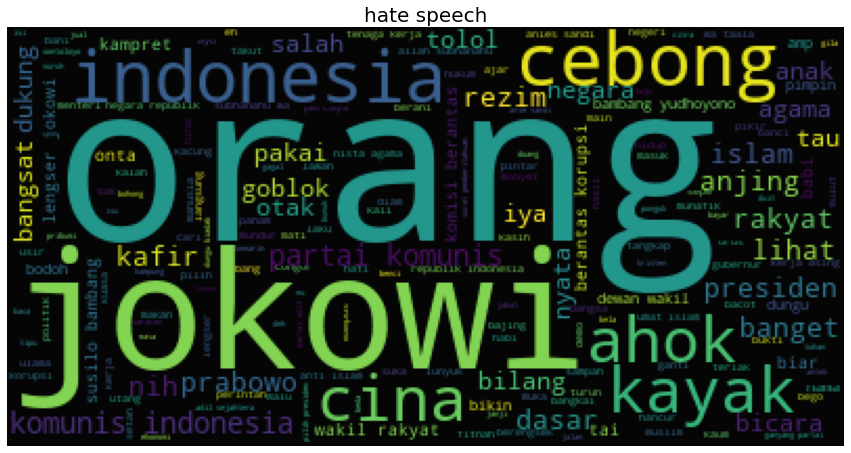

In [46]:
%matplotlib inline
# wordcloud
wc = WordCloud(background_color='black', max_words=200)
wc.generate(' '.join(df_hs_1['str_filtered']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("hate speech", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

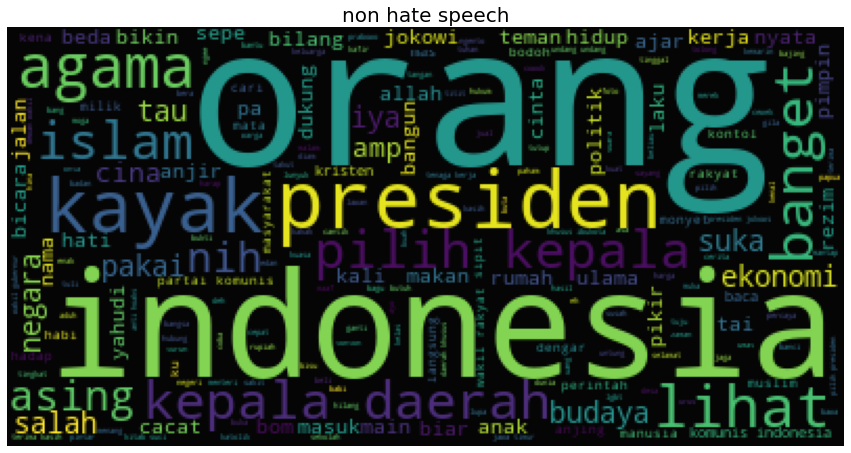

In [47]:
%matplotlib inline
wc = WordCloud(background_color='black', max_words=200)
wc.generate(' '.join(df_hs_0['str_filtered']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("non hate speech", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

In [48]:
# create df clean data and label
df_pre = spell_df[['str_filtered','HS']].copy()

In [49]:
df_pre.shape

(11852, 2)

In [50]:
df_pre.head()

,str_filtered,HS
0,insya allah,1
1,ayo umat islam pintar percaya aksi hubung pili...,1
2,utang triliun kampret hidup melarat makan cebo...,1
3,buka gagal paham kecebong pongok,1
4,beliau warga katolik mas kirim nomor,0


In [51]:
# create train and val data
X_train, X_val, y_train, y_val = train_test_split(df_pre['str_filtered'], df_pre['HS'], test_size = 0.1)

def marge_df(X_train, y_train):
  X_train = pd.DataFrame(X_train).reset_index()
  y_train = pd.DataFrame(y_train).reset_index()
  df_train = pd.merge(X_train, y_train, on='index', how='right')
  return df_train

In [52]:
train_df = marge_df(X_train, y_train)
val_df = marge_df(X_val, y_val)

In [53]:
train_df.shape

(10666, 3)

### fasttext

In [54]:
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz')) # fasttext file

In [55]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
    values = line.split()
    word = values [0].decode('utf-8')
    vector = np.asarray(values[1:], dtype='float32')
    vocab_and_vectors[word] = vector

In [ ]:
#vocab_and_vectors.keys()

In [135]:
# how many features should the tokenizer extract
features = 11000
tokenizer_fast = Tokenizer(num_words = features)
# fit the tokenizer on our text
tokenizer_fast.fit_on_texts(df_pre["str_filtered"].tolist())

# get all words that the tokenizer knows
word_index = tokenizer_fast.word_index
print(len(word_index))

# put the tokens in a matrix
X = tokenizer_fast.texts_to_sequences(df_pre["str_filtered"].tolist()) #list
X = pad_sequences(X) # list to matrix

# prepare the labels
y = df_pre["HS"].values

12946


In [147]:
type(X)

numpy.ndarray

In [137]:
y.shape

(11852,)

In [ ]:
#word_index.keys()

In [60]:
# split in train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=30)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(10666, 46) (10666,)
(1186, 46) (1186,)


In [61]:
embedding_matrix = np.zeros((len(word_index) + 1, 300)) # create matrix 13015 x 300
for word, i in word_index.items():
    embedding_vector = vocab_and_vectors.get(word)
    # words that cannot be found will be set to 0
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [66]:
embedding_matrix.shape[1]

300

### Word2vac

In [ ]:
# Load Pretrained Word2Vec
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
embed

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd1b02a0450>

In [ ]:
# get max token
def get_max_length(df):

    max_length = 0
    for row in df['str_filtered']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length


In [ ]:
max_length = get_max_length(df_pre)
max_length

49

In [ ]:
# Word2vec for word
def get_word2vec_enc(reviews):
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews

In [ ]:
vec= get_word2vec_enc(df_pre['str_filtered'])

In [ ]:
#change label to list
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [1,0]
    else:
        return [0,1]

In [ ]:
def get_padded_encoded_reviews(encoded_reviews):
    """
    for short sentences, we prepend zero padding so all input to RNN has same length
    """
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        #print(zero_padding_cnt)
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
          #print(i)
          enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

In [ ]:
vec = get_padded_encoded_reviews(vec)
vec[0].shape

(49, 250)

In [ ]:
def preprocess(df):
    """
    encode text value to numeric value
    """
    # encode words into word2vec
    reviews = df['str_filtered'].tolist()
    
    encoded_reviews = get_word2vec_enc(reviews)
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)
    # encoded sentiment
    sentiments = df['HS'].tolist()
    #encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    Y = np.array(sentiments)
    return X, Y

In [ ]:
train_x, train_y = preprocess(train_df)
val_x, val_y = preprocess(val_df)

In [ ]:
train_x.shape

(10666, 49, 250)

# Model

### Pipeline

In [ ]:
#word2vec
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
val_data = tf.data.Dataset.from_tensor_slices((val_x, val_y))

train_data = train_data.batch(124, drop_remainder=True)
val_data = val_data.batch(32, drop_remainder = True)

In [63]:
#fastext

train_data_fastext = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_data_fastext = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_data_fast = train_data_fastext.batch(124, drop_remainder=True)
val_data_fast = val_data_fastext.batch(32, drop_remainder = True)

## Base Model

In [140]:
# fasttext
def get_model_fast_base():
  model_base_fast = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim = len(word_index)+1,
                                output_dim = 300,
                                input_length=X.shape[1],
                                 
                                trainable=False),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])
  model_base_fast.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_base_fast

In [141]:
model_fast = get_model_fast_base()
hitory = model_fast.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 21s 208ms/step - loss: 0.6759 - accuracy: 0.5838 - val_loss: 0.6554 - val_accuracy: 0.6436
Epoch 2/20
86/86 [==============================] - 16s 181ms/step - loss: 0.6512 - accuracy: 0.6337 - val_loss: 0.6467 - val_accuracy: 0.6385
Epoch 3/20
86/86 [==============================] - 16s 181ms/step - loss: 0.6407 - accuracy: 0.6609 - val_loss: 0.6319 - val_accuracy: 0.6622
Epoch 4/20
86/86 [==============================] - 15s 180ms/step - loss: 0.6102 - accuracy: 0.6747 - val_loss: 0.6177 - val_accuracy: 0.6605
Epoch 5/20
86/86 [==============================] - 16s 181ms/step - loss: 0.5855 - accuracy: 0.6964 - val_loss: 0.6043 - val_accuracy: 0.6791
Epoch 6/20
86/86 [==============================] - 15s 180ms/step - loss: 0.5742 - accuracy: 0.7051 - val_loss: 0.6002 - val_accuracy: 0.6731
Epoch 7/20
86/86 [==============================] - 15s 180ms/step - loss: 0.5623 - accuracy: 0.7134 - val_loss: 0.5936 - val_accuracy: 0.6858
Epoch 8/20

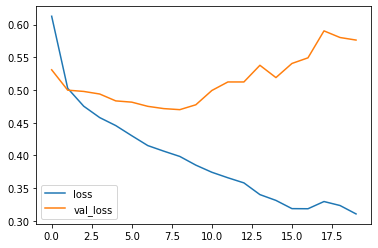

In [76]:
#loss
metrics = pd.DataFrame(hitory.history)
metrics[['loss', 'val_loss']].plot();

In [77]:
model_f_base = model_fast.predict(X_train)

In [78]:
model_f_base[model_f_base <= 0.5] = 0
model_f_base[model_f_base > 0.5] = 1

In [79]:
model_f_base = model_f_base.squeeze()

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model_f_base))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6163
           1       0.86      0.81      0.84      4503

    accuracy                           0.87     10666
   macro avg       0.87      0.86      0.86     10666
weighted avg       0.87      0.87      0.87     10666



In [ ]:
#word2vec
def get_model():
  model_base = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),                              
  ])

  model_base.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_base
    

In [ ]:
model = get_model()
hitory_word2vec = model.fit(train_data,epochs=20, validation_data = val_data)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



86/86 [==============================] - 28s 278ms/step - loss: 0.6732 - accuracy: 0.5800 - val_loss: 0.6637 - val_accuracy: 0.5853
Epoch 2/20
86/86 [==============================] - 23s 262ms/step - loss: 0.6398 - accuracy: 0.6233 - val_loss: 0.6335 - val_accuracy: 0.6334
Epoch 3/20
86/86 [==============================] - 22s 259ms/step - loss: 0.6149 - accuracy: 0.6547 - val_loss: 0.6210 - val_accuracy: 0.6512
Epoch 4/20
86/86 [==============================] - 21s 250ms/step - loss: 0.6001 - accuracy: 0.6647 - val_loss: 0.6187 - val_accuracy: 0.6495
Epoch 5/20
86/86 [==============================] - 22s 260ms/step - loss: 0.5901 - accuracy: 0.6751 - val_loss: 0.6034 - val_accuracy: 0.6706
Epoch 6/20
86/86 [==============================] - 22s 251ms/step - loss: 0.5791 - accuracy: 0.6815 - val_loss: 0.6116 - val_accuracy: 0.6546
Epoch 7/20
86/86 [==============================] - 22s 258ms/step - loss: 0.5743 - accuracy: 0.6835 - val_loss: 0.6090 - val_accuracy: 0.6664
Epoch 8/20

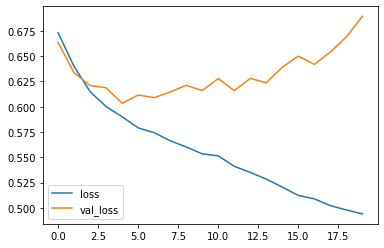

In [ ]:
#loss
metrics = pd.DataFrame(hitory_word2vec.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
predict_w2v_base = model.predict(train_x)

In [ ]:
predict_w2v_base

array([[0.5489253 ],
       [0.70373034],
       [0.6165893 ],
       ...,
       [0.5906396 ],
       [0.04882371],
       [0.54148525]], dtype=float32)

In [ ]:
predict_w2v_base[predict_w2v_base <= 0.5] = 0
predict_w2v_base[predict_w2v_base > 0.5] = 1

In [ ]:
print(classification_report(train_y, predict_w2v_base))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      6130
           1       0.62      0.82      0.71      4536

    accuracy                           0.71     10666
   macro avg       0.72      0.73      0.71     10666
weighted avg       0.74      0.71      0.71     10666



## model inprovement

In [ ]:
# fasttext
def get_model_fast1():
  model_fast1 = tf.keras.Sequential([
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),

      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dropout(.2),

      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])

  model_fast1.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast1

In [ ]:
model_fast1 = get_model_fast1()
hitory_fast1 = model_fast1.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



86/86 [==============================] - 4s 19ms/step - loss: 0.6150 - accuracy: 0.6704 - val_loss: 0.5484 - val_accuracy: 0.7154
Epoch 2/20
86/86 [==============================] - 1s 9ms/step - loss: 0.5166 - accuracy: 0.7517 - val_loss: 0.5101 - val_accuracy: 0.7373
Epoch 3/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4878 - accuracy: 0.7685 - val_loss: 0.4965 - val_accuracy: 0.7508
Epoch 4/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4685 - accuracy: 0.7776 - val_loss: 0.4868 - val_accuracy: 0.7559
Epoch 5/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4516 - accuracy: 0.7883 - val_loss: 0.4801 - val_accuracy: 0.7644
Epoch 6/20
86/86 [==============================] - 1s 10ms/step - loss: 0.4381 - accuracy: 0.7948 - val_loss: 0.4788 - val_accuracy: 0.7669
Epoch 7/20
86/86 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8027 - val_loss: 0.4763 - val_accuracy: 0.7677
Epoch 8/20
86/86 [===========

In [ ]:
predit_fast1 = model_fast1.predict(X_train)

In [ ]:
predit_fast1[predit_fast1 <= 0.5] = 0
predit_fast1[predit_fast1 > 0.5] = 1

In [ ]:
predict_fast1 = predit_fast1.squeeze()
print(classification_report(y_train, predict_fast1))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6192
           1       0.87      0.82      0.84      4474

    accuracy                           0.87     10666
   macro avg       0.87      0.87      0.87     10666
weighted avg       0.87      0.87      0.87     10666



In [108]:
# fasttext
def get_model_fast2():
  model_fast2 = tf.keras.Sequential([
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),

      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      #tf.keras.layers.Dropout(.2),

      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])

  model_fast2.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast2

In [109]:
model_fast2 = get_model_fast2()
hitory_fast2 = model_fast2.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 13s 112ms/step - loss: 0.6120 - accuracy: 0.6476 - val_loss: 0.5437 - val_accuracy: 0.7331
Epoch 2/20
86/86 [==============================] - 9s 101ms/step - loss: 0.5113 - accuracy: 0.7501 - val_loss: 0.5118 - val_accuracy: 0.7492
Epoch 3/20
86/86 [==============================] - 9s 101ms/step - loss: 0.4806 - accuracy: 0.7662 - val_loss: 0.4902 - val_accuracy: 0.7593
Epoch 4/20
86/86 [==============================] - 9s 102ms/step - loss: 0.4609 - accuracy: 0.7795 - val_loss: 0.4901 - val_accuracy: 0.7711
Epoch 5/20
86/86 [==============================] - 9s 101ms/step - loss: 0.4458 - accuracy: 0.7898 - val_loss: 0.4817 - val_accuracy: 0.7677
Epoch 6/20
86/86 [==============================] - 9s 102ms/step - loss: 0.4352 - accuracy: 0.7978 - val_loss: 0.4870 - val_accuracy: 0.7703
Epoch 7/20
86/86 [==============================] - 9s 101ms/step - loss: 0.4202 - accuracy: 0.8078 - val_loss: 0.4828 - val_accuracy: 0.7686
Epoch 8/20
86/86

In [110]:
predit_fast2 = model_fast2.predict(X_train)

predit_fast2[predit_fast2 <= 0.5] = 0
predit_fast2[predit_fast2 > 0.5] = 1

predict_fast2 = predit_fast2.squeeze()
print(classification_report(y_train, predict_fast2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6163
           1       0.83      0.83      0.83      4503

    accuracy                           0.85     10666
   macro avg       0.85      0.85      0.85     10666
weighted avg       0.85      0.85      0.85     10666



In [81]:
# fasttext
def get_model_fast3():
  model_fast3 = tf.keras.Sequential([
      tf.keras.layers.Embedding(len(word_index)+1,
                                300, 
                                input_length=X.shape[1], 
                                weights=[embedding_matrix],
                                trainable=False),
      tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
      tf.keras.layers.Dense(1, kernel_initializer = keras.initializers.GlorotNormal(seed=123), activation='sigmoid'),
  ])
  model_fast3.compile(optimizer= keras.optimizers.Adam(),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model_fast3

In [82]:
model_fast3 = get_model_fast3()
hitory_fast3 = model_fast3.fit(train_data_fast,epochs=20, validation_data = val_data_fast)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 18s 174ms/step - loss: 0.6059 - accuracy: 0.6637 - val_loss: 0.5294 - val_accuracy: 0.7483
Epoch 2/20
86/86 [==============================] - 22s 252ms/step - loss: 0.5001 - accuracy: 0.7534 - val_loss: 0.5067 - val_accuracy: 0.7542
Epoch 3/20
86/86 [==============================] - 20s 227ms/step - loss: 0.4785 - accuracy: 0.7723 - val_loss: 0.4957 - val_accuracy: 0.7644
Epoch 4/20
86/86 [==============================] - 13s 155ms/step - loss: 0.4634 - accuracy: 0.7808 - val_loss: 0.4898 - val_accuracy: 0.7694
Epoch 5/20
86/86 [==============================] - 13s 155ms/step - loss: 0.4519 - accuracy: 0.7885 - val_loss: 0.4849 - val_accuracy: 0.7736
Epoch 6/20
86/86 [==============================] - 13s 154ms/step - loss: 0.4413 - accuracy: 0.7961 - val_loss: 0.4802 - val_accuracy: 0.7855
Epoch 7/20
86/86 [==============================] - 13s 155ms/step - loss: 0.4312 - accuracy: 0.8016 - val_loss: 0.4766 - val_accuracy: 0.7880
Epoch 8/20

In [111]:
predit_fast3 = model_fast3.predict(X_train)

predit_fast3[predit_fast3 <= 0.5] = 0
predit_fast3[predit_fast3 > 0.5] = 1

predict_fast3 = predit_fast3.squeeze()
print(classification_report(y_train, predict_fast3))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6163
           1       0.86      0.81      0.83      4503

    accuracy                           0.86     10666
   macro avg       0.86      0.86      0.86     10666
weighted avg       0.86      0.86      0.86     10666



## Model Inference

In [112]:
df_test1 = df_test.copy()

In [117]:
df_test1.head(2)

,index,Tweet,HS,text
0,9290,"RT USER: Suciwati Munir: ""Saya Enggak Percaya ...",1,suciwati munir saya tidak percaya sama jokowi ...
1,11333,USER USER USER USER USER USER USER USER USER U...,1,lah memang sekarang presiden nya prabowo tolol...


In [118]:
df_test1.drop('index',axis=1, inplace=True)

In [119]:
df_test1['text'] = df_test1['Tweet'].apply(preprocess_filter)
df_test1[['text']].head(2)

,text
0,suciwati munir saya tidak percaya sama jokowi ...
1,lah memang sekarang presiden nya prabowo tolol...


In [120]:
df_test1['text_lemma'] = df_test1['text'].apply(lemma)

In [121]:
df_test1.shape

(1317, 4)

In [122]:
df_test1

,Tweet,HS,text,text_lemma
0,"RT USER: Suciwati Munir: ""Saya Enggak Percaya ...",1,suciwati munir saya tidak percaya sama jokowi ...,suciwati munir saya tidak percaya sama jokowi ...
1,USER USER USER USER USER USER USER USER USER U...,1,lah memang sekarang presiden nya prabowo tolol...,lah memang sekarang presiden nya prabowo tolol...
2,KLHK Upayakan Pemerataan Ekonomi Melalui TORA ...,0,kementerian lingkungan hidup dan kehutanan upa...,menteri lingkung hidup dan hutan upaya perata ...
3,Inilah Tujuan Mereka Mengkriminalisasi Ulama !...,1,inilah tujuan mereka mengkriminalisasi ulama,ini tuju mereka kriminalisasi ulama
4,Semua Sabar Dan Tenang'....; Kita Tunggu Koman...,1,semua sabar dan tenang kita tunggu komando hab...,semua sabar dan tenang kita tunggu komando hab...
...,...,...,...,...
1312,muhasabah diri jap kenapa noo,0,muhasabah diri jap kenapa no,muhasabah diri jap kenapa no
1313,Bencong macem Ivan lo percaya...hadeuhh kaka n...,1,bencong macam ivan kamu percayahadeuhh kakak n...,bencong macam ivan kamu percayahadeuhh kakak n...
1314,Tindakan kesewenang wenangan ini cerminan dari...,1,tindakan kesewenang wejangan ini cerminan dari...,tindak wenang wejang ini cermin dari pusat kua...
1315,Bila baca story cousin aku ni aku jadi malu. D...,0,bila baca cerita cousin aku nih aku jadi malu ...,bila baca cerita cousin aku nih aku jadi malu ...


In [123]:
review = []
for index, row in df_test1.iterrows():
    suggestions = sym_spell.lookup_compound(row["text_lemma"], max_edit_distance=2)
    review.append(suggestions[0].term)
    
df_test1["text_lemma"] = review
df_test1.shape

(1317, 4)

In [124]:
df_test1['text_filtering'] = df_test1['text_lemma'].apply(nltk_stemmer_indo)
df_test1['text_filtering'] = df_test1['text_filtering'].apply(nltk_stemmer_eng)

In [125]:
df_test1['str_filtered'] = df_test1['text_filtering'].apply(listToString)

In [126]:
df_test1.head()

,Tweet,HS,text,text_lemma,text_filtering,str_filtered
0,"RT USER: Suciwati Munir: ""Saya Enggak Percaya ...",1,suciwati munir saya tidak percaya sama jokowi ...,suciwati munir saya tidak percaya sama jokowi ...,"[suciwati, munir, percaya, jokowi, bicara, doang]",suciwati munir percaya jokowi bicara doang
1,USER USER USER USER USER USER USER USER USER U...,1,lah memang sekarang presiden nya prabowo tolol...,lah memang sekarang presiden nya prabowo tolol...,"[presiden, prabowo, tolol, goblok]",presiden prabowo tolol goblok
2,KLHK Upayakan Pemerataan Ekonomi Melalui TORA ...,0,kementerian lingkungan hidup dan kehutanan upa...,menteri lingkung hidup dan hutan upaya perata ...,"[menteri, lingkung, hidup, hutan, upaya, perat...",menteri lingkung hidup hutan upaya perata ekon...
3,Inilah Tujuan Mereka Mengkriminalisasi Ulama !...,1,inilah tujuan mereka mengkriminalisasi ulama,ini tuju mereka kriminalisasi ulama,"[tuju, kriminalisasi, ulama]",tuju kriminalisasi ulama
4,Semua Sabar Dan Tenang'....; Kita Tunggu Koman...,1,semua sabar dan tenang kita tunggu komando hab...,semua sabar dan tenang kita tunggu komando hab...,"[sabar, tenang, tunggu, komando, hab, ibana, h...",sabar tenang tunggu komando hab ibana habib ri...


In [127]:
df_test_pre = df_test1[['str_filtered','HS']].copy()

In [128]:
df_test_pre.head()

,str_filtered,HS
0,suciwati munir percaya jokowi bicara doang,1
1,presiden prabowo tolol goblok,1
2,menteri lingkung hidup hutan upaya perata ekon...,0
3,tuju kriminalisasi ulama,1
4,sabar tenang tunggu komando hab ibana habib ri...,1


In [129]:
df_test_pre.shape

(1317, 2)

In [138]:
#X_test_pre = tokenizer.texts_to_matrix(df_test_pre['str_filtered'].tolist())
X_test = tokenizer_fast.texts_to_sequences(df_test_pre["str_filtered"].tolist())
X_test = pad_sequences(X_test)


In [101]:
y_test = df_test["HS"].values

In [ ]:
pred_test = model_fast.predict(X_test)

In [ ]:
pred_test[pred_test <= 0.5] = 0
pred_test[pred_test > 0.5] = 1

pred_test = pred_test.squeeze()

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       748
           1       0.80      0.82      0.81       569

    accuracy                           0.83      1317
   macro avg       0.83      0.83      0.83      1317
weighted avg       0.83      0.83      0.83      1317



hasil dari training model base antara model word2vec dengan fasttext menagalami overfitting 

EDA analisysis : 
1. pada label hate speech memiliki label yang balance dengan HS 42.2% dan no_HS 57.8%
2. pada label jenis heate speech yang paling tinggi yaitu Abusive dengan nilai 27.5%
3. quantity jumlah kata pada setiap kalimat paling banyak pada junlah kata 6 dengan quantity 530
4. kata paling banyak sebeklun dilakukan lemma, spell dan stemmimng yaitu kaya yang dengan nilai sekisar 4500
5. kata paling banyak setelah dilakukan prepros yaitu kata indonesia dengan nilai sekisar 1200

Model analis :
1. model terbaik antara model base dengan menggunakan word2vec dengan model base dengan fasttext yaitu model base dengan fasttext dengan recall score, sehingga saya menggnakan fasttext
2. model terbaik yaitu model base dengan fasttext 
